In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

data = pd.read_csv("Admission_Predict.csv")
data.head(10)



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
data.drop(["Serial No."], axis = 1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X = data.drop(["Chance of Admit "], axis = 1)
y = data["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
average_mse = -mse_scores.mean()

print('Average MSE on training set: ', average_mse)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("MSE: ", (np.sqrt(mean_squared_error(y_test, predictions))))


Average MSE on training set:  0.003777580150532156
MSE:  0.06931367611555975


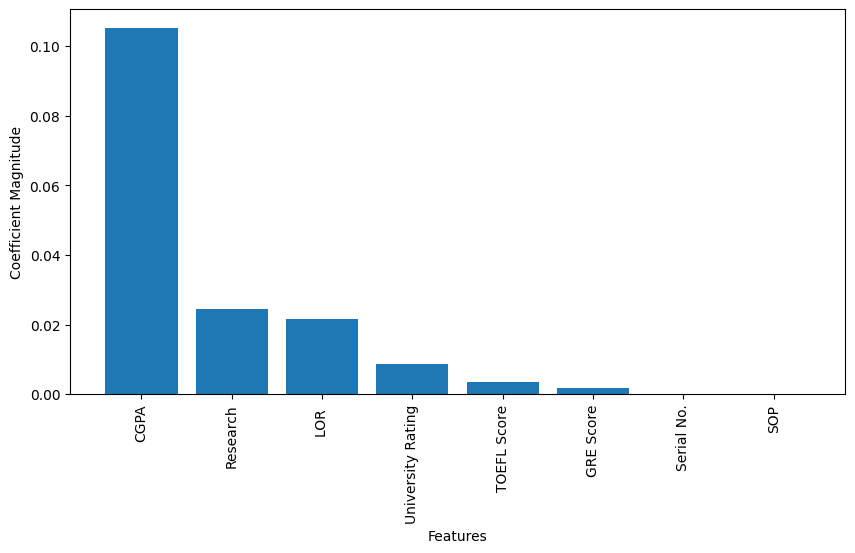

In [ ]:
import matplotlib.pyplot as plt

# Fit the model to the full dataset
model.fit(X, y)

# Get the feature coefficients
coef = pd.Series(model.coef_, index=X.columns)

# Sort the coefficients by absolute value
sorted_coef = coef.abs().sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.bar(sorted_coef.index, sorted_coef.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.show()

**Linear Regression Model**
The above model is a linear regression model, which was built using the scikit-learn library. I split the data into training and testing data, 80 percent and 20 percent, and it uses 5 fold cross validation to get a better, or more accurate, MSE. On top of that, the MSE is basically used to see how well the model perfroemd, and based off of this, it performed failry well seeing as though the error is only about 6.9 percent, which in the case of this project is fairly good. The model makes a prediction on the test set and overall, it is a good model.

From the bar graph above, you can see that the feature that effects admission status the most is CGPA, and it plays a much bigger role in admission status than any other feature. The one that effects the model the least is the GRE score, and the SOP.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data and split into features and target variable
data = pd.read_csv("Admission_Predict.csv")
X = data.drop(["Chance of Admit "], axis = 1)
y = data["Chance of Admit "]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a decision tree regression model on the training set using 5-fold cross-validation
model = DecisionTreeRegressor(max_depth=3, random_state=None)
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
average_mse = -mse_scores.mean()

print('Average MSE on training set: ', average_mse)

# Evaluate the model on the test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE on test set: ', mse)

Average MSE on training set:  0.004761665853641095
MSE on test set:  0.00804192939836571


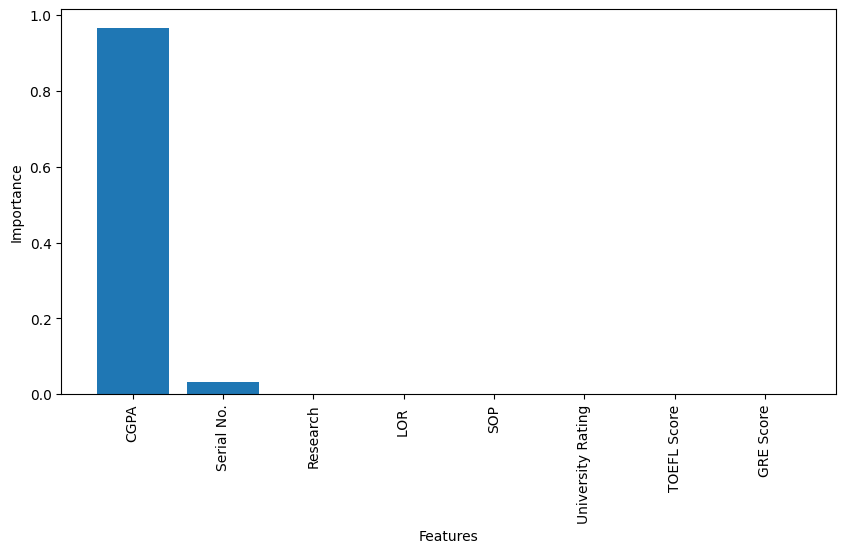

In [ ]:
import matplotlib.pyplot as plt

# Fit the model to the full dataset
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

**Decision Tree Regressor**
The code starts by loading the data and splitting it into the feature matrix and the target matrix. Following this, the code is split into training and testing data, same as before, 80 and 20 percent. After splitting the data, I instantiated the DecisionTreeRegressor with a maximum depth of 3. After this, I use 5 fold cross validation using the MSE to score the the model, also known as showing the loss function, then, I return the average MSE. From DecisionTreeRegressor, I was able to get a loss of .8 percent.

Same as the LinearRegression model, the feature that seems to have the biggest effect on getting into grad school is CGPA, which to me is not a huge surprise, but what is surprising is how little the other features seem to play a role in the admission.

**Overall Comparison**
Overall, the decision tree regressor seemed to have a much lower loss than the linear regression, but from analyzing the featureg bar graph, I believe a reason for this could be because the decision tree regressor was overfitting in some way, because with the linear regression model, it seemed that all of the features had some effect on the model, wheras with the decision tree regressor, the features had little to ne effect on the model, not accounting for CGPA

My overall conclusion is that both of the models are very good, seeing as though they both present a very low loss function, but even though the linear regression model has a higer MSE, it might be better than the decision tree regressor because it is accounting for a lot more features, making it not so biased and overfitting.
